## 1. Data Summary

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [102]:
url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

df = pd.read_csv(url, header = None)

df.head(5)
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [103]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [104]:
df.dropna(subset=['price'], axis=0)

df.to_csv('aotumobile.csv', index=False)

In [105]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [106]:
df.describe()

df.describe(include = "all") # include also object-type

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [107]:
df[['length','compression-ratio']].describe()

,length,compression-ratio
count,205.000000,205.000000
mean,174.049268,10.142537
std,12.337289,3.972040
min,141.100000,7.000000
25%,166.300000,8.600000
50%,173.200000,9.000000
75%,183.100000,9.400000
max,208.100000,23.000000


In [108]:
df.info

<bound method DataFrame.info of      symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd      

## 2. Data Wrangling

### 1) Missing data

In [109]:
# there are ? in data --> replace

df.replace('?', np.nan, inplace = True)
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [110]:
# null data --> .isnull() / .notnull()

missingDat = df.isnull()

missingDat.head(3)

# count missing data --> .value_counts() or sum(T/F)



,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [111]:
# check how many missing in each column
colist = missingDat.columns.values.tolist() # put column names in a list

for x in colist:
    print(x)
    print(missingDat[x].value_counts()) # .value_counts()
    print("") # empty row

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [112]:
# deal with missing data in numerica --> replace with average

avg_norm_loss = df['normalized-losses'].astype('float').mean(axis=0) # obj->numerics
df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace = True)

avg_bore = df['bore'].astype('float').mean(axis=0)
df['bore'].replace(np.nan, avg_bore, inplace = True)

avg_stroke = df['stroke'].astype('float').mean(axis=0)
df['stroke'].replace(np.nan, avg_stroke, inplace = True)

avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)


In [113]:
# deal with missing data in category --> replace with .idxmax()

df['num-of-doors'].value_counts().idxmax()

df['num-of-doors'].replace(np.nan, 'four', inplace = True)

In [114]:
# last reset index

df.reset_index(drop = True, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### 2) Correct data format

In [115]:
df.dtypes

df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### 3) Standardization

In [116]:
# Unit conversion

df['city-L/100km'] = 235/df['city-mpg']
df['highway-L/100km'] = 235/df['highway-mpg']
# df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)


In [117]:
# Normalization

df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()


Text(0.5, 1.0, 'horsepower bins')

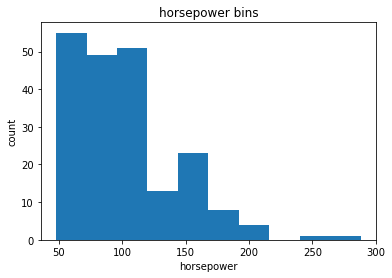

In [118]:
# Binning --> pd.cut

df['horsepower'] = df['horsepower'].astype(int, copy = True) # convert format

%matplotlib inline
plt.hist(df['horsepower'])
plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower bins')


Text(0.5, 1.0, 'horsepower bins')

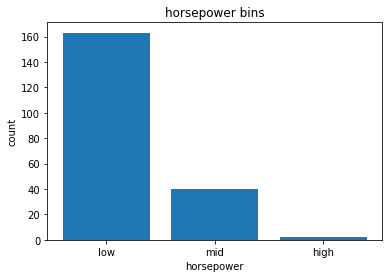

In [119]:
# Rebin - put into 3 bins low, mid, high
bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
grName = ['low','mid','high']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=grName, include_lowest=True)

df[['horsepower','horsepower-binned']].head(5)

# Bar plot with objects (not numerics)
plt.bar(grName, df['horsepower-binned'].value_counts()) # plt.bar(labels, col_with_objects)

plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower bins')

Text(0.5, 1.0, 'horsepower bins')

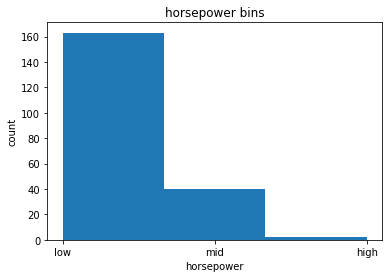

In [120]:
# Hist visual with objects (not numerics)

plt.hist(df['horsepower-binned'], bins=3)

plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower bins')

### 4) Indicator/Dummy Variables

In [121]:
# get category var ready for regression --> pd.get_dummies

dummy_fuel = pd.get_dummies(df['fuel-type'])

dummy_fuel.head()
# if need to change column name
# dummy_fuel.rename(columns = {'col1': 'new_col1', 'col2': 'new_col2'}, inplace = True)

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [122]:
# add columns to df --> pd.concat

df = pd.concat([df, dummy_fuel], axis = 1)
df.drop('fuel-type', axis = 1, inplace = True) # drop the old column

In [123]:
# another column 'aspiration'

dummy_aspi = pd.get_dummies(df['aspiration'])
dummy_aspi.head()

df = pd.concat([df, dummy_aspi],axis=1)
df.drop('aspiration', axis=1, inplace = True)

### 5) Save to csv

In [124]:
df.to_csv('clean_df.csv')

## 3. Exploratory

### 1) General check correlation between numerical columns

In [125]:
df.corr()

df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055909,0.005201,0.575707
stroke,-0.055909,1.000000,0.186105,0.088133
compression-ratio,0.005201,0.186105,1.000000,-0.205717
horsepower,0.575707,0.088133,-0.205717,1.000000


,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


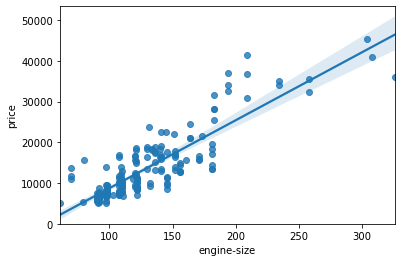

In [126]:
# Pos linear reg

sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

df[['engine-size','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


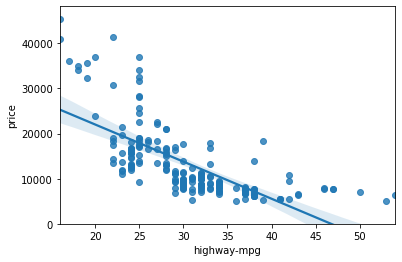

In [127]:
# Neg linear reg

sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

df[['highway-mpg','price']].corr()


,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


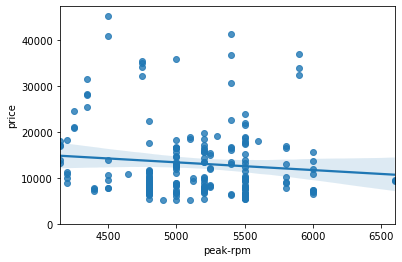

In [128]:
# Weak linear reg

sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)

df[['peak-rpm','price']].corr()


### 2) General check relation with categorical variables

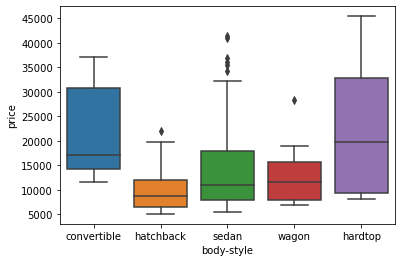

In [129]:
# boxplot that not a good predictor (too much overlap)

sns.boxplot(x='body-style', y='price', data=df)

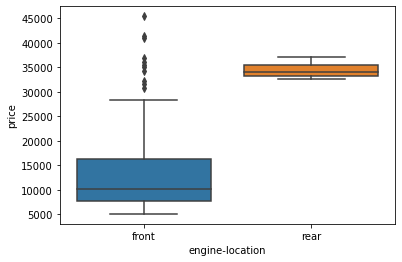

In [130]:
# boxplot that maybe a good predictor

sns.boxplot(x='engine-location', y='price', data=df)

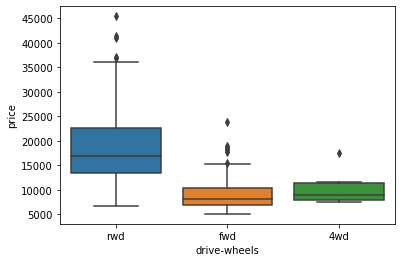

In [131]:
# boxplot that a potential good predictor
sns.boxplot(x='drive-wheels',y='price',data=df)

### 3) Statistical Analysis

In [132]:
# general

df.describe()

df.describe(include=['object']) # just objects

df.describe(include='all') # all variables

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo
count,205.000000,205.000000,205,205,205,205,205,205.000000,205.000000,205.000000,...,205.000000,205.000000,201.000000,205.000000,205.000000,205,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,22,2,5,3,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,four,sedan,fwd,front,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,low,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,116,96,120,202,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,98.756585,0.836373,0.911588,...,25.219512,30.751220,13207.129353,9.949525,8.034347,NaN,0.097561,0.902439,0.819512,0.180488
std,1.245307,31.681008,NaN,NaN,NaN,NaN,NaN,6.021776,0.059285,0.029671,...,6.542142,6.886443,7947.066342,2.573104,1.849782,NaN,0.297446,0.297446,0.385535,0.385535
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,0.834025,...,13.000000,16.000000,5118.000000,4.795918,4.351852,NaN,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.000000,NaN,NaN,NaN,NaN,NaN,94.500000,0.799135,0.886584,...,19.000000,25.000000,7775.000000,7.833333,6.911765,NaN,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.000000,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,0.905947,...,24.000000,30.000000,10295.000000,9.791667,7.833333,NaN,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.000000,NaN,NaN,NaN,NaN,NaN,102.400000,0.879865,0.925311,...,30.000000,34.000000,16500.000000,12.368421,9.400000,NaN,0.000000,1.000000,1.000000,0.000000


In [133]:
# value counts

df['drive-wheels'].value_counts()

drive_wheels_df = df['drive-wheels'].value_counts().to_frame() # output as df

# reset columns and index
drive_wheels_df.rename(columns = {'drive-wheels':'value_counts'}, inplace = True)
drive_wheels_df.index.name = 'drive_wheels'

drive_wheels_df

,value_counts
drive_wheels,
fwd,120
rwd,76
4wd,9


In [135]:
df['engine-location'].value_counts()
engine_loc_df = df['engine-location'].value_counts().to_frame()
engine_loc_df.rename(columns = {'engine-location':'value_counts'}, inplace = True)
engine_loc_df.index.name = 'engine-location'
engine_loc_df

,value_counts
engine-location,
front,202
rear,3


In [136]:
# grouping by one variable  

df['drive-wheels'].unique() # .unique()

df_group_one = df[['drive-wheels','body-style','price']]

df_group_one = df_group_one.groupby(['drive-wheels'], as_index=False).mean()  #.groupby().mean()
df_group_one


,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [137]:
# grouping by two variables

df_group_two = df[['drive-wheels','body-style','price']]
df_group_two = df_group_two.groupby(['drive-wheels','body-style'],as_index=False).mean()
df_group_two


,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [139]:
# pivot (after groupby two) --> .pivot(index='col1',columns='col2')

df_group_pivot = df_group_two.pivot(index='drive-wheels', columns = 'body-style')
df_group_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [141]:
# use 0 to replace NA

df_group_pivot = df_group_pivot.fillna(0)
df_group_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

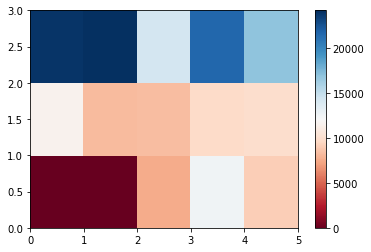

In [142]:
# Heatmap to visualize

plt.pcolor(df_group_pivot, cmap='RdBu')

plt.colorbar()
plt.show() # labels are not meaningful


# Recreate more helpful new labels

fig, ax = plt.subplots()
im = ax.pcolor(df_group_pivot, cmap='RdBu')

#col & row label names as indexes
row_labels = df_group_pivot.columns.levels[1]
col_labels = df_group_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_group_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_group_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### 4) Statistical Correlation

In [158]:
# Between numerics: Pearson correlation + P-value --> scipy.stats.pearsonr

df.dropna(subset=['price'], axis=0, inplace=True) # cannot have null values

pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
# significant correlation: p < 0.001 + value of pearson_coef (pos,neg,strong,weak)


TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [159]:
# Between a numeric and a category: ANOVA f-test score + P-value --> scipy.stats.f_oneway
df_anova = df[['drive-wheels','price']].groupby(['drive-wheels'])

df_anova.get_group('4wd')['price'] # get values for one type of category

f_val, p_cal = stats.f_oneway(df_anova.get_group('fwd')['price'],
                              df_anova.get_group('rwd')['price'], 
                              df_anova.get_group('4wd')['price']) 
                              # notice this output only means at least 2 of these are strongly related, not all 3
#Strong correlation: p < + f >> 

## 4. Modeling

### 1) Linear regression

In [160]:
from sklearn.linear_model import LinearRegression

38423.305858157386 [-821.73337832]


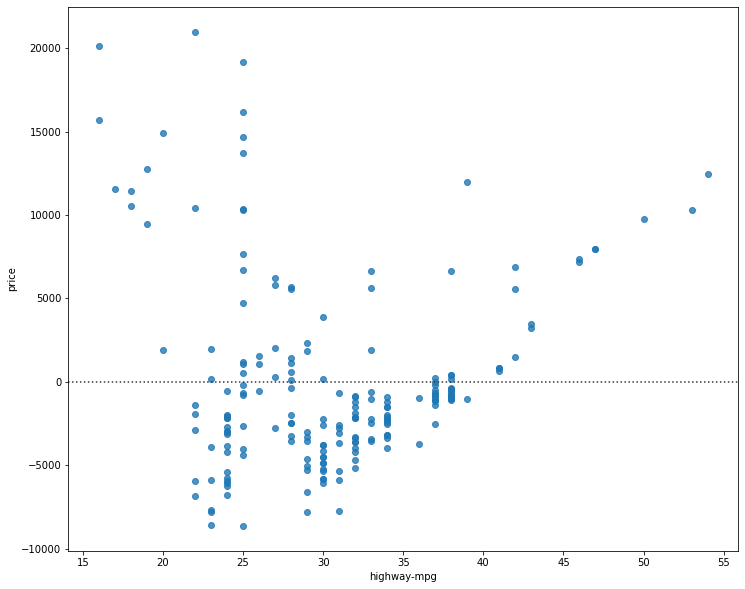

In [168]:
# single variable

X=df[['highway-mpg']] # 2D
y=df['price']         # 1D

lm=LinearRegression()
lm.fit(X,y)
yhat=lm.predict(X)

print(lm.intercept_, lm.coef_)

# visualize with regplot, residplot
width=12
height=10
plt.figure(figsize=(width,height))

#sns.regplot(x="highway-mpg", y="price", data=df)

sns.residplot(x="highway-mpg", y="price", data=df) # linear is not a good fit


-15811.863767729243 [53.53022809  4.70805253 81.51280006 36.1593925 ]


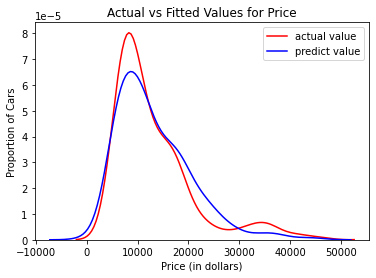

In [173]:
# multiple variables

X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']

lm=LinearRegression()
lm.fit(X,y)
yhat=lm.predict(X)

print(lm.intercept_, lm.coef_)


# visualize with distplot

ax1 = sns.distplot(y, color='red', hist=False, label='actual value') # hist=False turn off hist
sns.distplot(yhat,color='blue',hist=False, ax=ax1,label = 'predict value')

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

### 2) Polyfit

In [179]:
# np.polyfit

X=df['highway-mpg'] # 1D
y=df['price']       # 1D

fnp = np.polyfit(X,y,3) # order of 3

yhat = np.poly1d(fnp)

# visual 
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [185]:
# sklearn.PolynomialFeature

from sklearn.preprocessing import PolynomialFeatures

X=df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']] # 2D
y=df['price']         # 1D

fpoly = PolynomialFeatures(degree=3)

Xtran = fpoly.fit_transform(X) # fit poly

# Linear after poly transform
lmPoly = LinearRegression()
lmPoly.fit(Xtran, y)

array([-4.77159677e+07, -5.29838076e+02, -4.23539489e+01,  4.49017814e+03,
        1.69590179e+04, -1.21065269e+01,  3.23981030e+00, -2.29883180e+01,
        1.92837690e+00, -3.51204218e-02, -1.90874693e+00,  3.53104303e+00,
        1.52400239e+01, -1.91480783e+02, -3.09283995e+02, -1.99895466e-01,
       -6.21104258e-03,  7.13694930e-01,  9.10319538e-02, -3.38111347e-05,
       -4.10071838e-03, -3.49053235e-02, -5.30445137e-01,  2.43625974e-01,
        1.30096968e-01,  4.03984998e-05, -1.75687603e-03, -2.30348936e-03,
        3.22624478e-02,  1.33860884e-01, -5.64980392e-02, -2.99782678e-02,
       -1.18543936e+00,  1.94045839e+00,  1.96752229e+00])

### 3) Pipeline

In [186]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [188]:
# create a pipeline ('name', function)

Input = [('scale', StandardScaler()),
        ('polynomial', PolynomialFeatures(include_bias=False)),
        ('model', LinearRegression())]

pipe = Pipeline(Input)

pipe.fit(X,y)

yhat = pipe.predict(X)


array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955])

## 5. Evaluation

### 1) In-sample (R2 & MSE)

In [194]:
# R2 (higher = better)

from sklearn.metrics import r2_score

r2_score(y,yhat)

#or
lm.score(X,y)


0.8093732522175299

In [195]:
# MSE (lower = better)

from sklearn.metrics import mean_squared_error

mean_squared_error(y,yhat)

9656350.346203275

In [196]:
# note 
new_input=np.arange(1, 100, 1).reshape(-1, 1) # make each number a list

### 2) Train and test sample

In [208]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

df = df._get_numeric_data() # only get numerics

In [209]:
y_data = df['price']
x_data = df.drop('price', axis=1) # all except y

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.15, random_state=1)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(170, 20) (31, 20) (170,) (31,)


In [210]:
# fit and evaluation

lm = LinearRegression()
lm.fit(x_train[['horsepower']], y_train)

print(lm.score(x_train[['horsepower']], y_train)) # in-sample R2 def. smaller
print(lm.score(x_test[['horsepower']], y_test))   # out-sample R2

0.6449517437659684
0.707688374146705


### 3) Cross-validation Score - all data as train

In [215]:
# all kinds of evaluating scores

from sklearn.model_selection import cross_val_score

Rcvs = cross_val_score(lm, x_data[['horsepower']], y_data, cv = 4)  # default r2 in each fold

print("The mean of the folds are", Rcvs.mean(), "and the standard deviation is" , Rcvs.std())

cross_val_score(lm, x_data[['horsepower']], y_data, cv = 4, scoring = 'neg_mean_squared_error') 

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


array([-20254142.84026704, -43745493.26505169, -12539630.34014931,
       -17561927.72247591])

In [216]:
# predict with cv

from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(lm, x_data[['horsepower']], y_data, cv = 4)


### 4) Model selection (overfit & underfit)

<p>Always check both evaluation scores and plots (normal plot, distplot,...)

In [231]:
%%capture
! pip install ipywidgets

from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

In [234]:
# distplot

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [233]:
# normal plot

def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1).reshape(-1,1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x)), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [235]:
# interaction plot

def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)
    
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

### 5) Ridge regression (Regulization)

In [218]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [220]:
# ridge model

from sklearn.linear_model import Ridge

rmdl = Ridge(alpha = 0.1) 

rmdl.fit(x_train_pr, y_train)
yhat = rmdl.predict(x_test_pr)

rmdl.score(x_test_pr, y_test)

/Users/yan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.43365e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


0.8240784706875639

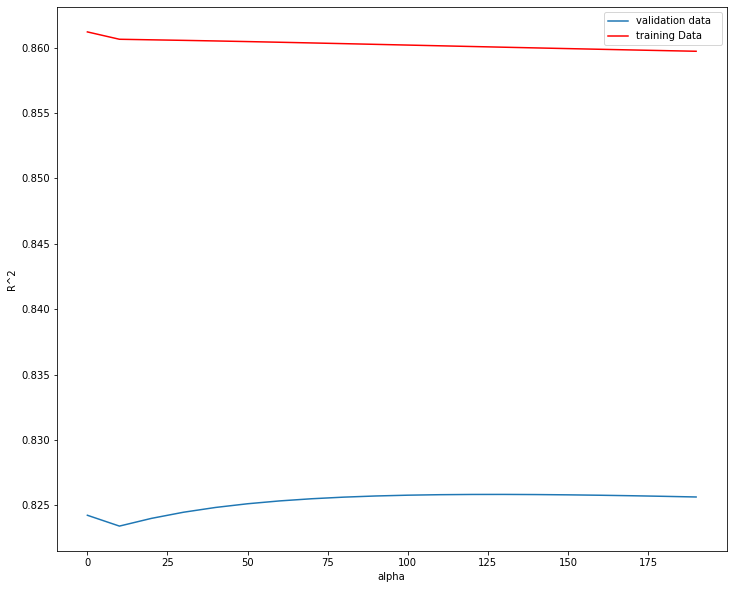

In [223]:
# for-loop to choose an alpha

r2test_rmdl=[]
r2train_rmdl=[]
Alist = 10 * np.array(range(0,20)) # 0,10,...,200

for alf in Alist:
    rmdlTry = Ridge(alpha = alf)
    rmdlTry.fit(x_train_pr, y_train)
    sc = rmdlTry.score(x_test_pr, y_test)
    r2test_rmdl.append(sc)
    sc = rmdlTry.score(x_train_pr, y_train)
    r2train_rmdl.append(sc)
    
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alist,r2test_rmdl, label='validation data  ')
plt.plot(Alist,r2train_rmdl, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
    

### 6) Grid search (choose regulization term)

In [227]:
from sklearn.model_selection import GridSearchCV

# initialize model

para = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000], 'normalize': [True, False]}]
rr = Ridge()

rgrid = GridSearchCV(rr, para, cv=4) # ridge model, alpha choices, csv

rgrid.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000,
                                    100000],
                          'normalize': [True, False]}])

In [228]:
# find the best one
rrBest = rgrid.best_estimator_
rrBest

Ridge(alpha=0.1, normalize=True)

In [229]:
# score for test set
rrBest.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8205078913208558